In [3]:
import numpy as np
import BLEanalysis.angleinference as AngleInference
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
from BLEanalysis.signals import Signals
testsigs = Signals("../bluetooth_experiments/March 26 2025 Field Trial/Range Trials/1.log",'c',angleOffset=0)
testsigs.summarise()
trainingsigs = Signals("../bluetooth_experiments/no rf amp experiments/noamploc2long.log", 'd', angleOffset = 38)
trainingsigs.summarise()

Standardising angles and times (shifting by 0.00 degrees)
Transmitter       Number of records
        c                 8315
Standardising angles and times (shifting by 38.00 degrees)
Transmitter       Number of records
        d                39557


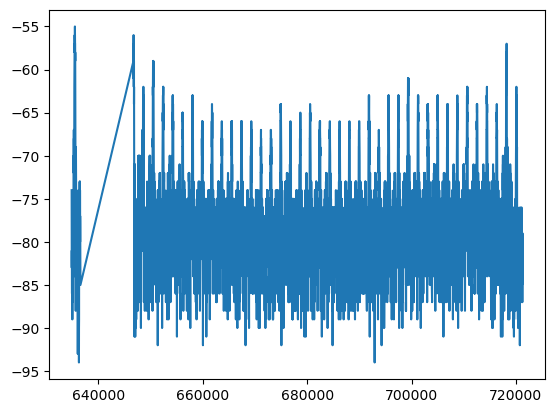

In [4]:
plt.plot([i[3] for i in testsigs.data],[i[0] for i in testsigs.data])
plt.show()

In [30]:
obs, obsangles = testsigs.getSample(1500, 150, target_time = 710000)
obsangles

array([1.64, 2.16,  nan, 3.16, 3.68, 4.17, 4.69, 5.2 , 5.67, 6.18, 0.37,
       0.89, 1.36, 1.88, 2.37])

In [31]:
angles_testset = AngleInference.AnglesUsePatternMeans(trainingsigs,noisevar=10**2) # Create object using training set

In [32]:
logp,errs,avgAtAngles,keptObs = angles_testset.infer(obs,obsangles) # Use infer on the test set of obs and obsangles (angles instead of times)

(0.0, 359.0)

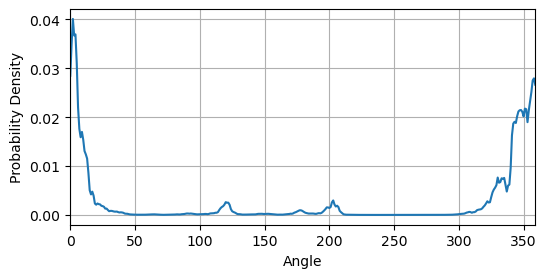

In [33]:
p = np.exp(logp - np.max(logp))
p/= np.sum(p)

####PLOT
plt.figure(figsize=[6,2.8])
#Plot p
plt.plot(p)
#plt.plot(p2,'r--')
plt.grid()
plt.ylabel('Probability Density')
plt.xlabel('Angle')
plt.xlim([0,359])

#plt.vlines(360-100,0,np.max(p)*1.2,color='k',alpha=0.5) #True (ish)

# TEST WITH PEAKS

In [47]:
obs, obsangles = testsigs.getSample(1500, 150, target_time = 670000)
angles_testset = AngleInference.AnglesUsePeaks(3)
angles_testset.infer(obs, obsangles)

6.2482787221397

# Path Inference With Peaks

In [2]:
import numpy as np
import BLEanalysis.angleinference as AngleInference

In [4]:
def normalize_degrees(angle):
    normalized = angle % 360
    return normalized if normalized >= 0 else normalized + 360

def normalize_radians(angle):
    normalized = angle % (2 * np.pi)
    return normalized if normalized >= 0 else normalized + 2 * np.pi